## Data and Libraries

In [49]:
# install library
!pip install squarify

In [50]:
# import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import squarify

In [10]:
df = pd.read_csv('netflix_customer_survey.csv')
df.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected
0,7,2,10,HBO,one_per_day,1
1,7,6,8,Marvel,one_per_show,1
2,7,4,15,Disney,one_per_day,1
3,7,5,10,HBO,one_per_day,1
4,7,1,20,Soccer,one_per_show,1


## Data Processing

In [51]:
# isolate X and y
y = df.selected
X = df.drop(columns = ['selected', 'customerid'])
X.head()

,NumberAccounts,price,ExtraContent,ads
0,2,10,HBO,one_per_day
1,6,8,Marvel,one_per_show
2,4,15,Disney,one_per_day
3,5,10,HBO,one_per_day
4,1,20,Soccer,one_per_show


In [118]:
# create dummy variables
X_dummy = pd.get_dummies(X, columns = X.columns)
X_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,price_20,ExtraContent_Disney,ExtraContent_HBO,ExtraContent_Marvel,ExtraContent_Prime originals,ExtraContent_Soccer,ExtraContent_less content,ads_none,ads_one_per_day,ads_one_per_show
0,False,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True


## Regression Model

In [119]:
# Build the regression model
model = sm.GLM(y,
               X_dummy,
               family = sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2982
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1948.3
Date:                Mon, 08 Apr 2024   Deviance:                       3896.6
Time:                        19:26:19   Pearson chi2:                 3.00e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            0.08371
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
NumberAccounts_1                -0.7045      0.090     -7.820      0.000      -0.881      -0.528
NumberAccounts_2                -0.0733      0.088     -0.831      0.406      -0.246       0.100
NumberAccounts_3                -0.0219      0.088     -0.250      0.803      -0.194       0.150
NumberAccounts_4                 0.1252      0.083      1.501      0.133      -0.038       0.289
NumberAccounts_5                 0.1318      0.085      1.559      0.119      -0.034       0.297
NumberAccounts_6                 0.4974      0.083      6.019      0.000       0.335       0.659
price_8                          0.2971      0.085      3.492      0.000       0.130       0.464
price_10                         0.2206      0.087      2.535      0.011       0.050       0.391
price_12                         0.2019      0.082      2.448      0.014       0.040       0.364
price_15                         0.0198      0.084      0.235      0.814      -0.145       0.185
price_18                        -0.1030      0.087     -1.185      0.236      -0.273       0.067
price_20                        -0.6817      0.090     -7.544      0.000      -0.859      -0.505
ExtraContent_Disney              0.2281      0.087      2.607      0.009       0.057       0.400
ExtraContent_HBO                 0.2270      0.085      2.669      0.008       0.060       0.394
ExtraContent_Marvel              0.1452      0.084      1.724      0.085      -0.020       0.310
ExtraContent_Prime originals     0.1278      0.086      1.479      0.139      -0.042       0.297
ExtraContent_Soccer             -0.2047      0.085     -2.412      0.016      -0.371      -0.038
ExtraContent_less content       -0.5687      0.088     -6.487      0.000      -0.740      -0.397
ads_none                         0.2081      0.056      3.749      0.000       0.099       0.317
ads_one_per_day                  0.1092      0.056      1.935      0.053      -0.001       0.220
ads_one_per_show                -0.3626      0.057     -6.380      0.000      -0.474      -0.251
================================================================================================
"""

## Conjoint Analysis

In [20]:
# create a dataframe with the results
df_result = pd.DataFrame({'param_name': model.params.keys(),
                          'partworth': model.params.values,
                          'pval': model.pvalues})
df_result

,param_name,partworth,pval
NumberAccounts_1,NumberAccounts_1,-0.704489,5.279505e-15
NumberAccounts_2,NumberAccounts_2,-0.073296,4.062003e-01
NumberAccounts_3,NumberAccounts_3,-0.021887,8.026344e-01
NumberAccounts_4,NumberAccounts_4,0.125169,1.334098e-01
NumberAccounts_5,NumberAccounts_5,0.131761,1.189398e-01
NumberAccounts_6,NumberAccounts_6,0.497415,1.750181e-09
price_8,price_8,0.297095,4.800878e-04
price_10,price_10,0.220596,1.124026e-02
price_12,price_12,0.201930,1.435247e-02
price_15,price_15,0.019755,8.144931e-01


In [28]:
# identify statistically significant variables
df_result['is_significant'] = (df_result['pval'] < .05)
df_result['color'] = ['blue' if x else 'red' for x in df_result['is_significant']]
df_result.head()

,param_name,partworth,pval,is_significant,color
NumberAccounts_1,NumberAccounts_1,-0.704489,5.279505e-15,True,blue
NumberAccounts_2,NumberAccounts_2,-0.073296,4.062003e-01,False,red
NumberAccounts_3,NumberAccounts_3,-0.021887,8.026344e-01,False,red
NumberAccounts_4,NumberAccounts_4,0.125169,1.334098e-01,False,red
NumberAccounts_5,NumberAccounts_5,0.131761,1.189398e-01,False,red


In [33]:
# sort values
df_result = df_result.sort_values(by = "partworth", ascending = True)

<function matplotlib.pyplot.show(close=None, block=None)>

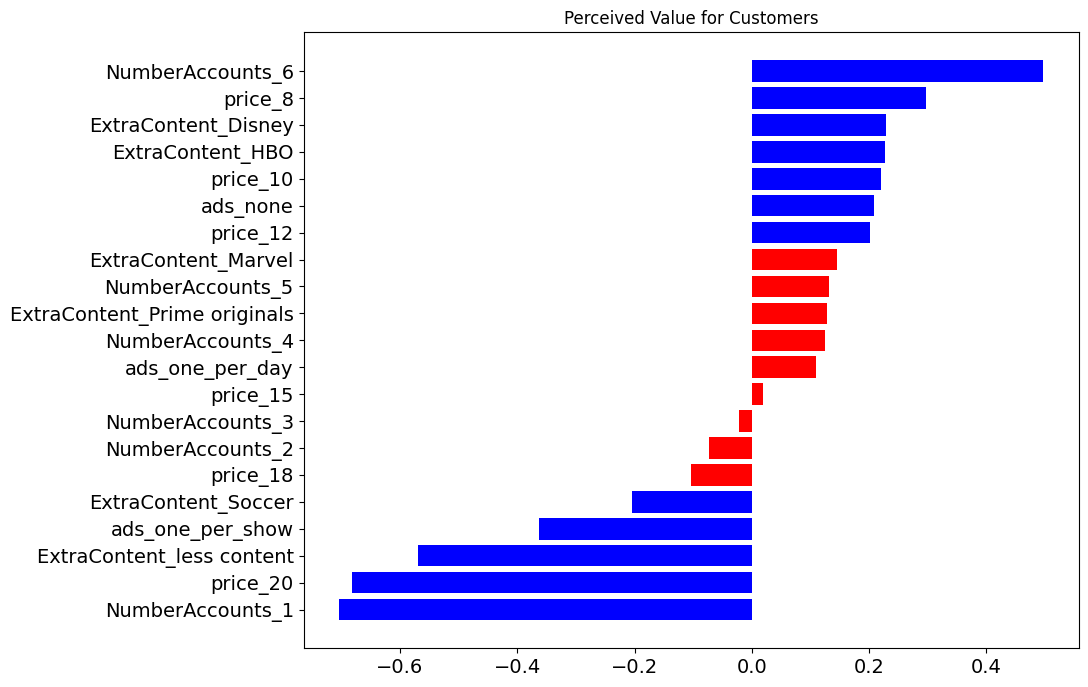

In [41]:
# plot the partworth
f, ax = plt.subplots(figsize = (10, 8))
values = df_result.partworth
xbar = np.arange(len(values))

# bar plot
plt.barh(xbar,
        values,
        color = df_result.color)
plt.yticks(xbar,
           labels = df_result.param_name,
          fontsize = 14)
plt.xticks(fontsize = 14)
plt.title("Perceived Value for Customers")
plt.show

## Specific Groups of Features

In [106]:
# isolate feature group
feature = "ExtraContent"
attributes = []
coefficients =[]
for i in range(len(df_result)):
  if df_result.iloc[i,0].find(feature) == 0:
    attributes.append(df_result.iloc[i,0])
    coefficients.append(df_result.iloc[i,1])
print(attributes)
print(coefficients)

['ExtraContent_less content', 'ExtraContent_Soccer', 'ExtraContent_Prime originals', 'ExtraContent_Marvel', 'ExtraContent_HBO', 'ExtraContent_Disney']
[-0.5686728978769825, -0.20474475495595884, 0.12780035995230649, 0.14516962506142853, 0.22697673274746621, 0.2281436316674289]


<function matplotlib.pyplot.show(close=None, block=None)>

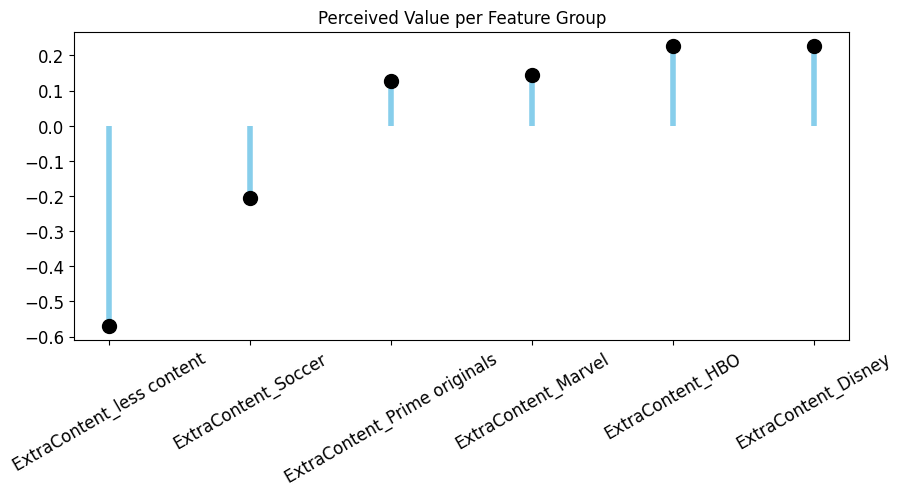

In [107]:
# lollipop chart
f, ax = plt.subplots(figsize = (10, 4))
plt.title("Perceived Value per Feature Group")

# lollipop plot
(markers, stemlines, baseline) = plt.stem(attributes,
                                          coefficients,
                                          linefmt = "-",
                                          markerfmt = "o",
                                          basefmt = " ")

# customize the lollipop
plt.setp(stemlines,
         color = "skyblue",
         linewidth = 4)
plt.setp(markers,
         color = "black",
         markersize = 10)

plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12,
          rotation = 30)
plt.show

## Feature Importance

In [73]:
# coefficients
features_partworth = {}
for key, coeff in model.params.items():
    split_key = key.split('_')
    feature = split_key[0]
    if feature not in features_partworth:
        features_partworth[feature] = list()
    features_partworth[feature].append(coeff)
features_partworth

{'NumberAccounts': [-0.7044890620054,
  -0.07329621314916437,
  -0.021887345749675387,
  0.1251691257222204,
  0.1317614553324152,
  0.49741473644529344],
 'price': [0.29709510755448115,
  0.22059639483462715,
  0.20193043942097816,
  0.019755215673731202,
  -0.10299623632992619,
  -0.6817082245582033],
 'ExtraContent': [0.2281436316674289,
  0.22697673274746621,
  0.14516962506142853,
  0.12780035995230649,
  -0.20474475495595884,
  -0.5686728978769825],
 'ads': [0.2081327193030869, 0.10916695110589059, -0.3626269738132887]}

In [75]:
# calculation: maximum of a feature minus minumum of said feature
importance_per_feature = {k: max(v) - min(v) for k, v in features_partworth.items()}
importance_per_feature

{'NumberAccounts': 1.2019037984506933,
 'price': 0.9788033321126846,
 'ExtraContent': 0.7968165295444114,
 'ads': 0.5707596931163756}

In [77]:
# sum of importances
total_importances = sum(importance_per_feature.values())

In [80]:
# relative importance
relative_importance_per_feature = {
    k: round(100* v/total_importances,1) for k, v in importance_per_feature.items()
}
relative_importance_per_feature

{'NumberAccounts': 33.9, 'price': 27.6, 'ExtraContent': 22.5, 'ads': 16.1}

In [84]:
# build dataframe
df_importances = pd.DataFrame(
    list(relative_importance_per_feature.items()),
    columns = ['feature', 'relative_importance'])
df_importances

,feature,relative_importance
0,NumberAccounts,33.9
1,price,27.6
2,ExtraContent,22.5
3,ads,16.1


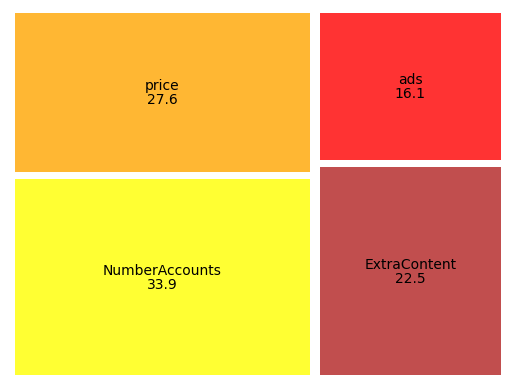

In [103]:
# treemap
squarify.plot(sizes = df_importances.relative_importance,
              label = df_importances.feature,
              color = ["yellow", "orange", "firebrick", "red"],
             value = df_importances.relative_importance,
             alpha = 0.8,
             pad = .3)
plt.axis("off")
plt.show()

## Interaction Terms

In [120]:
# create interaction terms
df['content_ads'] = df.ExtraContent + "_" + df.ads
df.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected,content_ads
0,7,2,10,HBO,one_per_day,1,HBO_one_per_day
1,7,6,8,Marvel,one_per_show,1,Marvel_one_per_show
2,7,4,15,Disney,one_per_day,1,Disney_one_per_day
3,7,5,10,HBO,one_per_day,1,HBO_one_per_day
4,7,1,20,Soccer,one_per_show,1,Soccer_one_per_show


In [124]:
# removing the variables in the interaction term
df_interaction = df.drop(columns = ['ExtraContent', 'ads'])
df_interaction.head()

,customerid,NumberAccounts,price,selected,content_ads
0,7,2,10,1,HBO_one_per_day
1,7,6,8,1,Marvel_one_per_show
2,7,4,15,1,Disney_one_per_day
3,7,5,10,1,HBO_one_per_day
4,7,1,20,1,Soccer_one_per_show


In [128]:
# isolate X and y
y2 = df_interaction.selected
X2 = df_interaction.drop(columns = ['selected', 'customerid'])
X2.head(2)

,NumberAccounts,price,content_ads
0,2,10,HBO_one_per_day
1,6,8,Marvel_one_per_show


In [129]:
# create dummy variables
X_dummy2 = pd.get_dummies(X, columns = X.columns)
X_dummy2.head()


,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,content_ads_Marvel_one_per_show,content_ads_Prime originals_none,content_ads_Prime originals_one_per_day,content_ads_Prime originals_one_per_show,content_ads_Soccer_none,content_ads_Soccer_one_per_day,content_ads_Soccer_one_per_show,content_ads_less content_none,content_ads_less content_one_per_day,content_ads_less content_one_per_show
0,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [130]:
# Build the regression model
model2 = sm.GLM(y,
               X_dummy,
               family = sm.families.Binomial()).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2972
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1941.8
Date:                Mon, 08 Apr 2024   Deviance:                       3883.6
Time:                        19:34:16   Pearson chi2:                 3.00e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            0.08767
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
NumberAccounts_1                            -0.7175      0.092     -7.811      0.000      -0.898      -0.537
NumberAccounts_2                            -0.0705      0.090     -0.785      0.433      -0.247       0.106
NumberAccounts_3                            -0.0334      0.089     -0.375      0.708      -0.208       0.141
NumberAccounts_4                             0.1121      0.085      1.325      0.185      -0.054       0.278
NumberAccounts_5                             0.1217      0.086      1.419      0.156      -0.046       0.290
NumberAccounts_6                             0.4915      0.083      5.894      0.000       0.328       0.655
price_8                                      0.2912      0.086      3.375      0.001       0.122       0.460
price_10                                     0.2112      0.089      2.383      0.017       0.037       0.385
price_12                                     0.2006      0.084      2.401      0.016       0.037       0.364
price_15                                     0.0088      0.085      0.103      0.918      -0.159       0.176
price_18                                    -0.1130      0.088     -1.278      0.201      -0.286       0.060
price_20                                    -0.6950      0.092     -7.567      0.000      -0.875      -0.515
content_ads_Disney_none                      0.3350      0.153      2.185      0.029       0.035       0.636
content_ads_Disney_one_per_day               0.5480      0.174      3.157      0.002       0.208       0.888
content_ads_Disney_one_per_show             -0.1558      0.158     -0.985      0.325      -0.466       0.154
content_ads_HBO_none                         0.5296      0.160      3.320      0.001       0.217       0.842
content_ads_HBO_one_per_day                  0.5103      0.155      3.288      0.001       0.206       0.815
content_ads_HBO_one_per_show                -0.3542      0.157     -2.258      0.024      -0.662      -0.047
content_ads_Marvel_none                      0.2577      0.152      1.690      0.091      -0.041       0.557
content_ads_Marvel_one_per_day               0.2302      0.157      1.464      0.143      -0.078       0.538
content_ads_Marvel_one_per_show             -0.0542      0.150     -0.361      0.718      -0.349       0.240
content_ads_Prime originals_none             0.2570      0.158      1.627      0.104      -0.053       0.566
content_ads_Prime originals_one_per_day      0.1291      0.155      0.836      0.403      -0.174       0.432
content_ads_Prime originals_one_per_show     0.0194      0.162      0.120      0.904      -0.297       0.336
content_ads_Soccer_none                      0.1461      0.154      0.950      0.342      -0.155       0.448
content_ads_Soccer_one_per_day 

## Interaction Terms Results

In [153]:
# create a dataframe with the results
df_result_int = pd.DataFrame({'param_name': model2.params.keys(),
                          'partworth': model2.params.values,
                          'pval': model2.pvalues})
# sort values
df_result_int = df_result_int.sort_values(by = "partworth", ascending = True)

In [154]:
# isolate feature group
feature = "content_ads"
attributes = []
coefficients =[]
for i in range(len(df_result_int)):
  if df_result_int.iloc[i,0].find(feature) == 0:
    if df_result_int.iloc[i,0].find("none") == -1:  
        attributes.append(df_result_int.iloc[i,0])
        coefficients.append(df_result_int.iloc[i,1])
print(attributes)
print(coefficients)

['content_ads_less content_one_per_show', 'content_ads_Soccer_one_per_show', 'content_ads_less content_one_per_day', 'content_ads_HBO_one_per_show', 'content_ads_Soccer_one_per_day', 'content_ads_Disney_one_per_show', 'content_ads_Marvel_one_per_show', 'content_ads_Prime originals_one_per_show', 'content_ads_Prime originals_one_per_day', 'content_ads_Marvel_one_per_day', 'content_ads_HBO_one_per_day', 'content_ads_Disney_one_per_day']
[-1.0917686499843289, -0.5074028704787629, -0.42417457816120197, -0.354227794263875, -0.24551952987943026, -0.1557985964682177, -0.054221942788520744, 0.019433572813362568, 0.12909012397798125, 0.2302118862050276, 0.5103397419764736, 0.5479520378459161]


<function matplotlib.pyplot.show(close=None, block=None)>

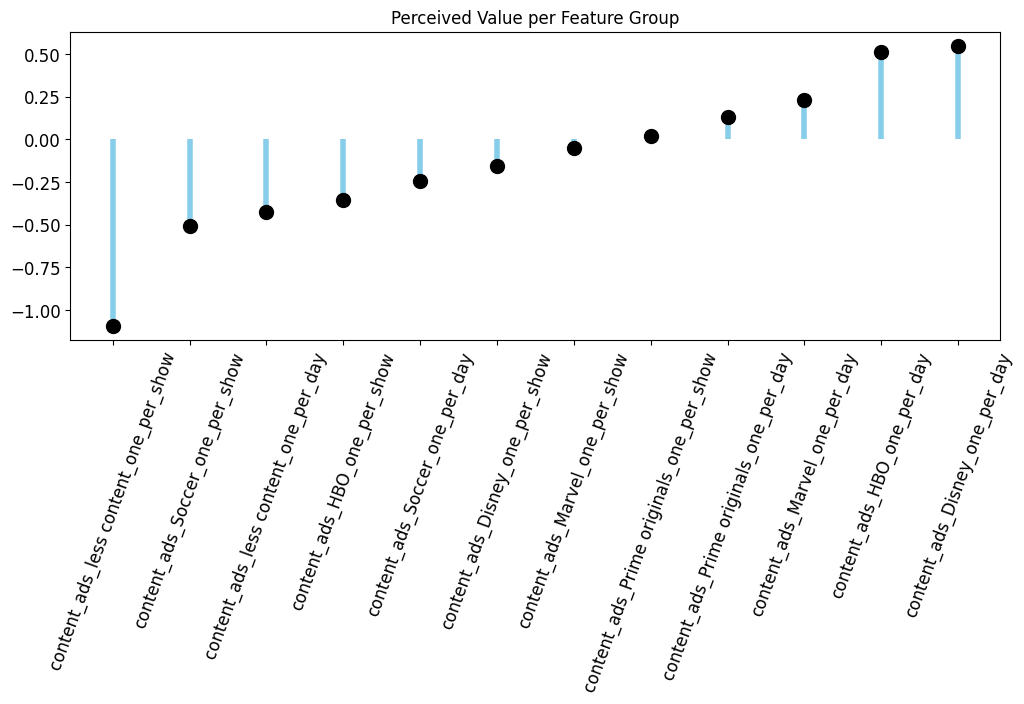

In [162]:
# lollipop chart
f, ax = plt.subplots(figsize = (12, 4))
plt.title("Perceived Value per Feature Group")

# lollipop plot
(markers, stemlines, baseline) = plt.stem(attributes,
                                          coefficients,
                                          linefmt = "-",
                                          markerfmt = "o",
                                          basefmt = " ")

# customize the lollipop
plt.setp(stemlines,
         color = "skyblue",
         linewidth = 4)
plt.setp(markers,
         color = "black",
         markersize = 10)

plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12,
          rotation = 70)
plt.show